In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import patsy

In [4]:
# Data: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
# UCI citation:
# Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

# Source:
# # Hadi Fanaee-T 

# Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto 
# INESC Porto, Campus da FEUP 
# Rua Dr. Roberto Frias, 378 
# 4200 - 465 Porto, Portugal 

# Original Source: http://capitalbikeshare.com/system-data 



bikes = pd.read_csv('bikes.csv')

In [5]:
# Fit model1
model1 = sm.OLS.from_formula('cnt ~ temp + windspeed + holiday', data=bikes).fit()

# Fit model2
model2 = sm.OLS.from_formula('cnt ~ hum + season + weekday', data=bikes).fit()

# Print R-squared for both models
print(model1.rsquared)
print(model2.rsquared)

0.41508122190306995
0.3883324473437183


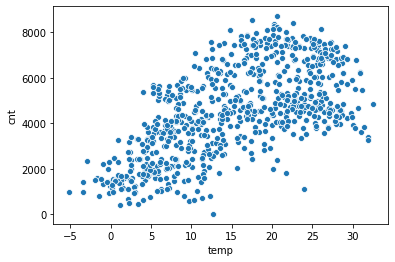

In [6]:
sns.scatterplot(x='temp', y='cnt', data = bikes)
plt.show()

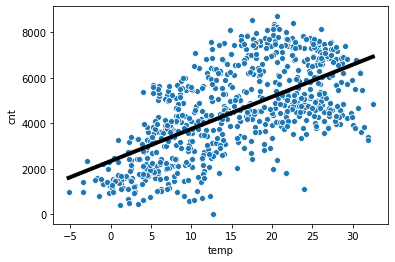

In [19]:
model1 = sm.OLS.from_formula('cnt ~ temp', data=bikes).fit()
xs = pd.DataFrame({'temp': np.linspace(bikes.temp.min(), bikes.temp.max(), 100)})
ys = model1.predict(xs)
sns.scatterplot(x='temp', y='cnt', data = bikes)
plt.plot(xs, ys, color = 'black', linewidth=4)
plt.show()

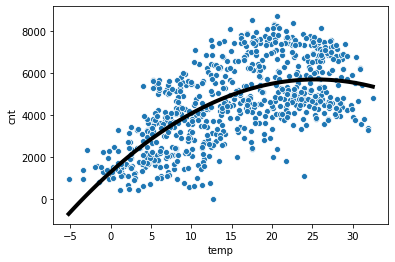

In [20]:
model2 = sm.OLS.from_formula('cnt ~ temp + np.power(temp, 2)', data=bikes).fit()
xs = pd.DataFrame({'temp': np.linspace(bikes.temp.min(), bikes.temp.max(), 100)})
ys = model2.predict(xs)
sns.scatterplot(x='temp', y='cnt', data = bikes)
plt.plot(xs, ys, color = 'black', linewidth=4)
plt.show()

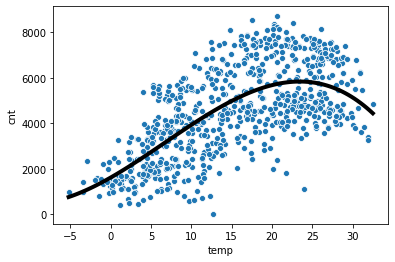

In [21]:
model3 = sm.OLS.from_formula('cnt ~ temp + np.power(temp, 2) + np.power(temp, 3)', data=bikes).fit()
xs = pd.DataFrame({'temp': np.linspace(bikes.temp.min(), bikes.temp.max(), 100)})
ys = model3.predict(xs)
sns.scatterplot(x='temp', y='cnt', data = bikes)
plt.plot(xs, ys, color = 'black', linewidth=4)
plt.show()

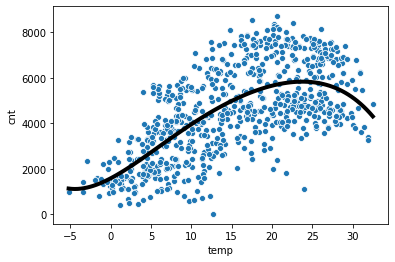

In [30]:
model4 = sm.OLS.from_formula('cnt ~ temp + np.power(temp, 2) + np.power(temp, 3) + np.power(temp, 4) + np.power(temp, 5)', data=bikes).fit()
xs = pd.DataFrame({'temp': np.linspace(bikes.temp.min(), bikes.temp.max(), 100)})
ys = model4.predict(xs)
sns.scatterplot(x='temp', y='cnt', data = bikes)
plt.plot(xs, ys, color = 'black', linewidth=4)
plt.show()

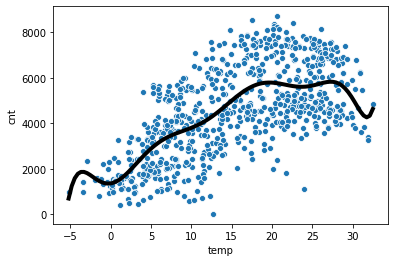

In [31]:
model5 = sm.OLS.from_formula('cnt ~ temp + np.power(temp, 2) + np.power(temp, 3) + np.power(temp, 4) + np.power(temp, 5) + np.power(temp, 6) + np.power(temp, 7) + np.power(temp, 8) + np.power(temp, 9) + np.power(temp, 10)', data=bikes).fit()
xs = pd.DataFrame({'temp': np.linspace(bikes.temp.min(), bikes.temp.max(), 100)})
ys = model5.predict(xs)
sns.scatterplot(x='temp', y='cnt', data = bikes)
plt.plot(xs, ys, color = 'black', linewidth=4)
plt.show()

In [32]:
print(model1.rsquared)
print(model2.rsquared)
print(model3.rsquared)
print(model4.rsquared)
print(model5.rsquared)

0.3937487313729241
0.4531790254908288
0.4626662622590385
0.4628445586311082
0.47118613034158985


In [33]:
print(model1.rsquared_adj)
print(model2.rsquared_adj)
print(model3.rsquared_adj)
print(model4.rsquared_adj)
print(model5.rsquared_adj)

0.3929171109770022
0.4516767700663531
0.4597057457976558
0.4591400383458055
0.46458512503378724


In [35]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model1, model2, model3, model4, model5)
print(anova_results.round(2))

   df_resid           ssr  df_diff       ss_diff      F  Pr(>F)
0     729.0  1.660847e+09      0.0           NaN    NaN     NaN
1     728.0  1.498035e+09      1.0  1.628114e+08  81.03    0.00
2     726.0  1.472045e+09      2.0  2.599062e+07   6.47    0.00
3     725.0  1.471556e+09      1.0  4.884492e+05   0.24    0.62
4     721.0  1.448704e+09      4.0  2.285203e+07   2.84    0.02


/Users/sophiesommer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/sophiesommer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/sophiesommer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [36]:
print(model1.llf)
print(model2.llf)
print(model3.llf)
print(model4.llf)
print(model5.llf)

-6386.767848313633
-6349.0580904730305
-6342.661081788197
-6342.539782614866
-6336.819342703741


In [37]:
print(model1.aic)
print(model2.aic)
print(model3.aic)
print(model4.aic)
print(model5.aic)

12777.535696627267
12704.116180946061
12695.322163576395
12697.079565229733
12693.638685407483


In [38]:
print(model1.bic)
print(model2.bic)
print(model3.bic)
print(model4.bic)
print(model5.bic)

12786.724523546765
12717.89942132531
12718.294230875144
12724.646045988231
12739.58282000498


In [39]:
# Set seed (don't change this)
np.random.seed(123)

# Split bikes data
indices = range(len(bikes))
s = int(0.8*len(indices))
train_ind = np.random.choice(indices, size = s, replace = False)
test_ind = list(set(indices) - set(train_ind))
bikes_train = bikes.iloc[train_ind]
bikes_test = bikes.iloc[test_ind]

# Fit model1
model1 = sm.OLS.from_formula('cnt ~ temp + atemp + hum', data=bikes_train).fit()

# Fit model2
model2 = sm.OLS.from_formula('cnt ~ season + windspeed + weekday', data=bikes_train).fit()

# Calculate predicted cnt based on model1
fitted1 = model1.predict(bikes_test)

# Calculate predicted cnt based on model2
fitted2 = model2.predict(bikes_test)

# Calculate PRMSE for model1
true = bikes_test.cnt
prmse1 = np.mean((true-fitted1)**2)**.5

# Calculate PRMSE for model2
prmse2 = np.mean((true-fitted2)**2)**.5

# Print PRMSE for both models
print(prmse1)
print(prmse2)

1460.39929474624
1570.4805833457629
